**Diabete**

---

![picture](https://drive.google.com/file/d/1AEhU6ApEECrbiabAo5LMI1u0XFv6uTd0/view?usp=sharing)

Diabetes refers to a collection of disorders that impair the body's use of blood sugar (glucose). Glucose is an essential energy source for the cells that comprise muscles and tissues. It is also the primary source of fuel for the brain.

The primary cause of each form of diabetes differs. But regardless of the kind of diabetes, it may result in elevated blood sugar levels. A high blood sugar level might cause severe health complications.

Heart disease, chronic kidney disease, nerve damage, and other issues with feet, dental health, eyesight, hearing, and mental health are common complications of diabetes.

The earlier diabetes type 2 is diagnosed, the better. This may lessen the likelihood of a person developing life-threatening problems. Early detection may also identify those at greater risk for developing type 2 diabetes and assist them in delaying or preventing the disease.

# Early Stage Diabetes Classifier

The problem statement is that we would like to create a system that detects if a patient shows the signs and symptoms of early stage diabetes. The goal is to detect these at-risk patients as early as possible to begin treatment and avoid unwanted health complications.

To address this problem, we’ll be using the open-source Early Stage Diabetes Risk Prediction Dataset. We’ll use data preprocessing techniques along with multiple machine learning models to create an adequate classification system. We’ll begin by exploring the data to better understand it.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

dataset is read into a pandas dataframe and the first few rows are examined.

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"
df = pd.read_csv(url)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


We can see above that we have one numerical column (age) along with a series of categorical columns relating to gender and exposure to medical conditions. It also contains a categorical column titled "class" which is positive or negative depending on if the patient is at risk for diabetes.

The class column is our target column which we would like to predict.

Now let's perform some exploratory data analysis.

First print out the shape of the dataframe to get a sense for how large the dataset is. 

In [6]:
df.shape

(520, 17)

We see that there are 17 columns in total and 520 rows. 

Let's look at some statistics for the numerical feature in our dataframe:


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


We see that the ages range from a minimum of 16 years old to a maxium of 90 years old. 

We also see that the average age is approximately 48 years old. 

Next let's look at our categorical features:

In [8]:
df.iloc[:,1:].astype('object').describe()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


We see that all of our categorical features only have 2 unique values. 

Interesting to note is that there are more males than females in this dataset. 

There is also more positive samples in this dataset.

Let's look at the the datatypes in our dataframe as well:


In [9]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

This aligns with what we observed earlier (1 numerical column, rest are categorical).

Let's also check for missing values:

In [10]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

We don't have any missing data in this dataset. 

Let's plot some charts to better understand the data. We'll start by looking at the gender distribution in this dataset:

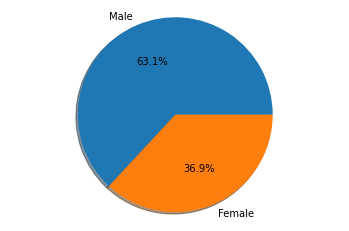

In [11]:
labels = ['Male', 'Female']
sizes = [df['Gender'].value_counts()[0],
         df['Gender'].value_counts()[1]
        ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Here we see that there are more males in this dataset than females. This could potentially indicate males are more at risk of early stage diabetes but this is not necessarily guaranteed. It could also depend on the availability of participants during data collection. 

But how does this correspond to positivity rate for each gender? Let's take a look at and see how many positive/negative cases there are for each gender:


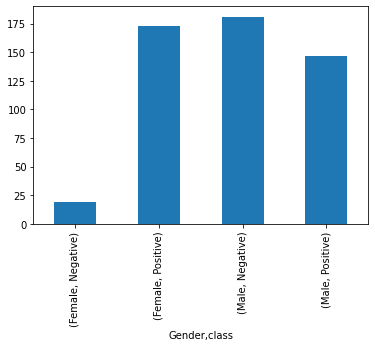

In [12]:
gender_dist = df.groupby(['Gender', 'class']).size()
gender_dist.plot(kind='bar')

In [13]:
gender_dist

Gender  class   
Female  Negative     19
        Positive    173
Male    Negative    181
        Positive    147
dtype: int64

In [14]:
print(f'What percentage of males are positive: {round(gender_dist[3]/(gender_dist[3]+gender_dist[2])*100)}%')
print(f'What percentage of females are positive: {round(gender_dist[1]/(gender_dist[1]+gender_dist[0])*100)}%')

What percentage of males are positive: 45%
What percentage of females are positive: 90%


Here we see that just under half of the males are positive while for females there is an imbalance in number of positive vs negative cases. 

This imbalance could potentially affect the performance of our classifiers so we will need to keep this in mind. 

Now let's take a look at relation between age and the target class:

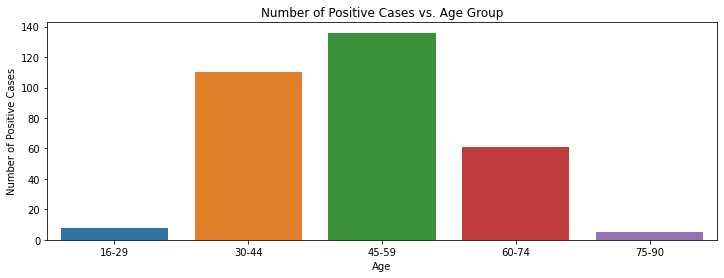

In [15]:
age_sub_DF = df.loc[:, ['Age', 'class']]
age_16_29 = age_sub_DF.Age[(df.Age >=16) & (df.Age<=29) & (df['class']=='Positive')]
age_30_44 = age_sub_DF.Age[(df.Age >=30) & (df.Age<=44) & (df['class']=='Positive')]
age_45_59 = age_sub_DF.Age[(df.Age >=45) & (df.Age<=59) & (df['class']=='Positive')]
age_60_74 = age_sub_DF.Age[(df.Age >=60) & (df.Age<=74) & (df['class']=='Positive')]
age_75_90 = age_sub_DF.Age[(df.Age >=75) & (df.Age<=90) & (df['class']=='Positive')]

age_array = [age_16_29, age_30_44, age_45_59, age_60_74, age_75_90]

plt.figure(figsize=(12,4))
sns.barplot(x=["16-29", "30-44", "45-59", "60-74", "75-90"], y = [len(age_bin.values) for age_bin in age_array])
plt.title("Number of Positive Cases vs. Age Group")
plt.xlabel("Age")
plt.ylabel("Number of Positive Cases")
plt.show()

Here we see that middle aged patients had the highest frequency of testing positive for early stage diabetes among all other age groups.

Let's also take a look at what the age distribution for each gender is for the participants in the dataset:

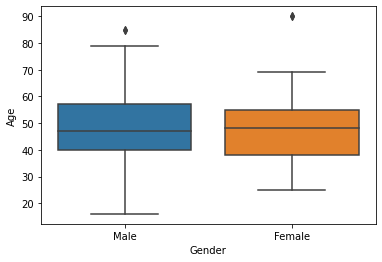

In [16]:
sns.boxplot(x ='Gender', y ='Age', data = df)

Although we saw earlier that the maximum age was 90 and minimum age was 16, we see that a majority of the participants in this study are approximately between the ages of 40 and 60, regardless of gender. 

Now let's take a look at some of the medical conditions and how it relates to the target. For instance, we can take a look at the 'weakness' column and compare it against the target:

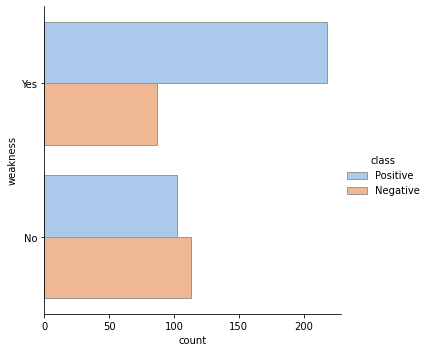

In [17]:
sns.catplot(y="weakness", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

We see that there is a significant number of participants who tested positive while also reporting that they experienced weakness as a symptom. This indicates that this might be a useful feature to use in our model as it may be a warning signal for early stage diabetes. 

# Data cleaning/pre-processing

We saw earlier that there are no missing values in our dataset. However there is some pre-processing we need to do before we can begin training models. Currently most of our data is in categorical form but we need to convert this to numerical form in order for the data to be compatible with the models
we plan to use. The categorical features are nominal and since the number of categories per feature is low (2 categories) we can use one-hot encoding. 

First we need to separate the target from the data:

In [18]:
X = df.drop('class', axis=1)
y = df['class']

Then we need to split our dataset into training and testing sets in order to avoid any potential data leakage:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Since our data contains a mix of numerical and categorical data we'll need to deal with these features separately:

In [20]:
# Store which columns are categorical
categorical_cols = X_train.columns[X_train.columns !='Age']

# Create one-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the data using the one-hot encoder
X_train_cat = pd.DataFrame(one_hot_encoder.fit_transform(X_train[categorical_cols]))
X_test_cat  = pd.DataFrame(one_hot_encoder.transform(X_test[categorical_cols]))

# Since the index was removed by the encoder, we need to put it back
X_train_cat.index = X_train.index
X_test_cat.index  = X_test.index

# Extract the numerical columns
X_train_num = X_train[['Age']]
X_test_num = X_test[['Age']]

# Combine the numerical and one-hot-encoded columns 
X_train_OH = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_OH = pd.concat([X_test_num, X_test_cat], axis=1)

In [21]:
X_train_OH.head()

,Age,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
457,48,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
429,58,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
394,59,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,55,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
141,62,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [22]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
457,48,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
429,58,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes
394,59,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes
141,62,Male,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No


In [23]:
# Encode the target
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

Let's start by implementing a Support Vector Machine (SVM) model which is a very popular algorithm used for binary classification problems. In the context of classification, an SVM is also known as a Support Vector Classifier (SVC) which is how we will refer to the model going forward. The SVC works by determining a separating hyperplane that maximizes the distance between the hyperplane and the nearest point in each class. The SVC is flexible in the sense that it can work for both linearly and non-linearly separable data by specifying the SVC's kernel. Using a non-linear kernel will create a classifier that is effective with non-linearly separable data. The non-linear kernel will map the data to a higher dimensional space for which the non-linearly separable data becomes linearly separable. 

Scikit-learn's implementation of SVC accepts as input a 'kernel' hyperparameter. We'll test a couple of different kernels while leaving the other hyperparameters as their default values. 

In [24]:
# Define SVC with linear kernel
linear_SVC = SVC(kernel='linear')

# Fit to the training data
linear_SVC.fit(X_train_OH, y_train)

# Predict on the test data
y_pred_linear_kernel = linear_SVC.predict(X_test_OH)

# Compute accuracy score
print(f'Train Accuracy: {linear_SVC.score(X_train_OH, y_train)}')
print(f'Test Accuracy: {linear_SVC.score(X_test_OH, y_test)}')
print(f'-'*50)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_linear_kernel))
print(f'-'*50)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_linear_kernel))

Train Accuracy: 0.9340659340659341
Test Accuracy: 0.9166666666666666
--------------------------------------------------
Confusion Matrix:
[[55  7]
 [ 6 88]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        62
           1       0.93      0.94      0.93        94

    accuracy                           0.92       156
   macro avg       0.91      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [25]:
# Define SVC with polynomial kernel
poly_SVC = SVC(kernel='poly')

# Fit to the training data
poly_SVC.fit(X_train_OH, y_train)

# Predict on the test data
y_pred_poly_kernel = poly_SVC.predict(X_test_OH)

# Compute accuracy score
print(f'Train Accuracy: {poly_SVC.score(X_train_OH, y_train)}')
print(f'Test Accuracy: {poly_SVC.score(X_test_OH, y_test)}')
print(f'-'*50)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_poly_kernel))
print(f'-'*50)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_poly_kernel))

Train Accuracy: 0.6208791208791209
Test Accuracy: 0.6217948717948718
--------------------------------------------------
Confusion Matrix:
[[ 3 59]
 [ 0 94]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09        62
           1       0.61      1.00      0.76        94

    accuracy                           0.62       156
   macro avg       0.81      0.52      0.43       156
weighted avg       0.77      0.62      0.50       156



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [26]:
# Define SVC with gaussian kernel
rbf_SVC = SVC(kernel='rbf')

# Fit to the training data
rbf_SVC.fit(X_train_OH, y_train)

# Predict on the test data
y_pred_rbf_kernel = rbf_SVC.predict(X_test_OH)

# Compute accuracy score
print(f'Train Accuracy: {rbf_SVC.score(X_train_OH, y_train)}')
print(f'Test Accuracy: {rbf_SVC.score(X_test_OH, y_test)}')
print(f'-'*50)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rbf_kernel))
print(f'-'*50)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_rbf_kernel))

Train Accuracy: 0.6208791208791209
Test Accuracy: 0.6025641025641025
--------------------------------------------------
Confusion Matrix:
[[ 0 62]
 [ 0 94]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.60      1.00      0.75        94

    accuracy                           0.60       156
   macro avg       0.30      0.50      0.38       156
weighted avg       0.36      0.60      0.45       156



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [27]:
# Define SVC with sigmoid kernel
sigmoid_SVC = SVC(kernel='sigmoid')

# Fit to the training data
sigmoid_SVC.fit(X_train_OH, y_train)

# Predict on the test data
y_pred_sigmoid_kernel = sigmoid_SVC.predict(X_test_OH)

# Compute accuracy score
print(f'Train Accuracy: {sigmoid_SVC.score(X_train_OH, y_train)}')
print(f'Test Accuracy: {sigmoid_SVC.score(X_test_OH, y_test)}')
print(f'-'*50)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_sigmoid_kernel))
print(f'-'*50)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_sigmoid_kernel))

Train Accuracy: 0.5
Test Accuracy: 0.5192307692307693
--------------------------------------------------
Confusion Matrix:
[[20 42]
 [33 61]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.32      0.35        62
           1       0.59      0.65      0.62        94

    accuracy                           0.52       156
   macro avg       0.48      0.49      0.48       156
weighted avg       0.51      0.52      0.51       156



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


While comparing these SVC models we'll be taking a look at a few metrics. 

First we look at the accuracy for each model. We see that the linear kernel results in the highest training and testing accuracies. However, since this is a classification problem it is not sufficient to simply look at accuracy. We also need to look at precision, recall and F1 score and it is helpful to see the confusion matrix to better understand the performance of the classifier. 

Looking at the confusion matrices we see that the gaussian SVC misclassifies all instances of class 0. We see this is reflected in the classification report as precision, recall and F1 score are all zero. The weighted average F1 score is also the lowest among all models (0.45). The polynomial SVC also performs poorly as it misclassifies 59/62 instances of class 0. We see a low recall and F1 score for class zero and a low weighted average F1 score (0.50). The sigmoid SVC shows a better confusion matrix in the sense that it misclassifies less instances of class 0 but it still has a significant number of misclassifications across both classes.It also shows a low accuracy and low weighted average F1 score (0.51). Finally, looking at the linear SVC we see a confusion matrix where only 7-8 instances of each class are misclassified. We see good precision and recall scores for each class, a high weighted average F1 score (0.92) and a high training and testing accuracy. 

Thus, for our first ML model we will choose the SVC with a linear kernel (named as 'linear_SVC').
Later in this analysis, we will use this model to compare the performance of both of our models.

Next we will implement our second model which will be a Gradient Boosting Classifier which is another popular algorithm used in classification problems. Gradient boosting is an ensemble technique that uses multiple weak models that combine to form a strong model. The idea is to train each weak model sequentially where each next model tries to correct the mistakes made by the previous model. 

Scikit-learn's GradientBoostingClassifier has several hyperparameters that can be tuned including learning rate, n_estimators, max_depth, and so on. For the purposes of this assignment we will not be hypertuning the algorithm (as per Part B, Question 5) since we will be using automated ML for that section. Instead, for this section we will focus only on learning rate and n_estimators to arrive at our second model. 

To begin with, we will focus on trying various learning rates while leaving the n_estimators as the default value (100). It should be noted that Gradient Boosting has a tendency for overfitting and this is directly related to the number of estimators being used (larger n_estimators = better performance but also leads to overfitting). This tendency for overfitting will be addressed momentarily in this analysis. 

In [28]:
# Learning rate values to try
learning_rates = [0.005, 0.01, 0.05, 0.1, 0.5, 0.75, 1.0]

# Iterate over each learning rate
for learning_rate in learning_rates:
    gb_clf = GradientBoostingClassifier(learning_rate=learning_rate, random_state=0)
    gb_clf.fit(X_train_OH, y_train)

    y_pred_gb_clf = gb_clf.predict(X_test_OH)

    # We will be using average F1 score as a metric to compare the performance of the models
    precision, recall, F1, _ = precision_recall_fscore_support(y_test, y_pred_gb_clf, average='weighted')

    print("Learning rate: ", learning_rate)
    print("Training Accuracy: {0:.3f}".format(gb_clf.score(X_train_OH, y_train)))
    print("Testing Accuracy: {0:.3f}".format(gb_clf.score(X_test_OH, y_test)))
    print("Average F1 Score: {0:.3f}".format(F1))
    print('-'*50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Learning rate:  0.005
Training Accuracy: 0.931
Testing Accuracy: 0.910
Average F1 Score: 0.910
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Learning rate:  0.01
Training Accuracy: 0.934
Testing Accuracy: 0.917
Average F1 Score: 0.916
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Learning rate:  0.05
Training Accuracy: 0.978
Testing Accuracy: 0.949
Average F1 Score: 0.949
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Learning rate:  0.1
Training Accuracy: 1.000
Testing Accuracy: 0.974
Average F1 Score: 0.974
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Learning rate:  0.5
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Learning rate:  0.75
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------
Learning rate:  1.0
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


We see a bit of overfitting occuring in our models as they slightly outperform on the training data as compared to the testing data. We'll attempt to deal with this momentarily by changing the n_estimators hyperparameter. For now, let's compare the testing accuracy and average F1 scores of these models. 
We see the highest testing accuracy and average F1 score when our learning rate is 1.0 (and when lr=0.5 but we'll go with 1.0 for this analysis). Let's now try changing the number of estimators. 

In [29]:
# Learning rate values to try
n_estimators = [1, 2, 5, 7, 10, 12, 15, 17 ,20, 22, 25, 100]

# Iterate over each learning rate
for n_estimator in n_estimators:
    gb_clf = GradientBoostingClassifier(learning_rate=1.0, n_estimators=n_estimator, random_state=0)
    gb_clf.fit(X_train_OH, y_train)

    y_pred_gb_clf = gb_clf.predict(X_test_OH)

    # We will be using average F1 score as a metric to compare the performance of the models
    precision, recall, F1, _ = precision_recall_fscore_support(y_test, y_pred_gb_clf, average='weighted')

    print("# of estimators: ", n_estimator)
    print("Training Accuracy: {0:.3f}".format(gb_clf.score(X_train_OH, y_train)))
    print("Testing Accuracy: {0:.3f}".format(gb_clf.score(X_test_OH, y_test)))
    print("Average F1 Score: {0:.3f}".format(F1))
    print('-'*50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

# of estimators:  1
Training Accuracy: 0.931
Testing Accuracy: 0.910
Average F1 Score: 0.910
--------------------------------------------------
# of estimators:  2
Training Accuracy: 0.948
Testing Accuracy: 0.917
Average F1 Score: 0.916
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

# of estimators:  5
Training Accuracy: 0.984
Testing Accuracy: 0.968
Average F1 Score: 0.968
--------------------------------------------------
# of estimators:  7
Training Accuracy: 0.992
Testing Accuracy: 0.968
Average F1 Score: 0.968
--------------------------------------------------
# of estimators:  10
Training Accuracy: 0.997
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------
# of estimators:  12
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# of estimators:  15
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

# of estimators:  17
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------
# of estimators:  20


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Training Accuracy: 1.000
Testing Accuracy: 0.987
Average F1 Score: 0.987
--------------------------------------------------
# of estimators:  22
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------
# of estimators:  25
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# of estimators:  100
Training Accuracy: 1.000
Testing Accuracy: 0.981
Average F1 Score: 0.981
--------------------------------------------------


We were able to close the generalization gap a bit by decreasing the number of estimators from 100 (the default) to 20. The performance of this model could be further improved by hypertuning all of the hyperparameters (outside the scope of this analysis as mentioned above). 

Thus, for our second ML model we will choose the GradientBoostingClassifier with 20 estimators and a learning rate of 1.0:

In [30]:
gb_clf = GradientBoostingClassifier(learning_rate=1.0, n_estimators=20, random_state=0)
gb_clf.fit(X_train_OH, y_train)
y_pred_gb_clf = gb_clf.predict(X_test_OH)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Finally we will compare our models using the same metrics we've been using throughout this analysis:

In [31]:
print('MODEL 1: SVC with Linear Kernel')

# Compute accuracy score
print(f'Train Accuracy: {linear_SVC.score(X_train_OH, y_train)}')
print(f'Test Accuracy: {linear_SVC.score(X_test_OH, y_test)}')
print(f'-'*50)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_linear_kernel))
print(f'-'*50)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_linear_kernel))

MODEL 1: SVC with Linear Kernel
Train Accuracy: 0.9340659340659341
Test Accuracy: 0.9166666666666666
--------------------------------------------------
Confusion Matrix:
[[55  7]
 [ 6 88]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        62
           1       0.93      0.94      0.93        94

    accuracy                           0.92       156
   macro avg       0.91      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [32]:
print('MODEL 2: Gradient Boosting Classifier')

# Compute accuracy score
print(f'Train Accuracy: {gb_clf.score(X_train_OH, y_train)}')
print(f'Test Accuracy: {gb_clf.score(X_test_OH, y_test)}')
print(f'-'*50)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gb_clf))
print(f'-'*50)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_gb_clf))

MODEL 2: Gradient Boosting Classifier
Train Accuracy: 1.0
Test Accuracy: 0.9871794871794872
--------------------------------------------------
Confusion Matrix:
[[62  0]
 [ 2 92]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      0.98      0.99        94

    accuracy                           0.99       156
   macro avg       0.98      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


We see the best training and testing accuracy with the gradient boosting classifier as compared to the SVC. Looking at the confusion matrix we see better performance with the gradient boosting classifier as it has less misclassifications than the SVC. Finally looking at the classification report we see better precision, recall and F1 score in the gradient boosting classifier. 